In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\numpyPandasTest\\fastcampus'

In [3]:
# 데이터 불러오기
corolla = pd.read_csv('../fcdata/ToyotaCorolla.csv')
corolla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# 데이터 수와 변수의 수 확인하기
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar, nVar)

1436 37


## 범주형 변수를 이진형 변수로 변환 - Fuel_Type

In [5]:
corolla.Fuel_Type.unique()

# 세 가지에 대해서 이진형 변수로 만들어 주기
# 최소한 3-1 개 만큼의 factor가 필요! => 우리는 세 가지에 대해서 모두 만들어 보자!

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [6]:
## 가변수 생성

dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [7]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [9]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [10]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

In [11]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
dummy_d

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
dummy_c

array([0, 0, 0, ..., 0, 0, 0])

## 불필요한 변수 제거 및 가변수 추가


In [14]:
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel':dummy_d, 'CNG': dummy_c})

In [15]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [16]:
corolla.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [17]:
# 불필요한 칼럼 제거
# 데이터 병합

corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_, Fuel), 1)
mlr_data

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,1,0,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,1,0,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,1,0,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,1,0,0


In [18]:
# bias 추가
# 상수항 추가

mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,7500,69,12,1998,20544,86,1,0,1300,...,0,1,1,1,0,0,0,1,0,0
1432,1.0,10845,72,9,1998,19000,86,0,0,1300,...,0,0,1,1,0,0,0,1,0,0
1433,1.0,8500,71,10,1998,17016,86,0,0,1300,...,0,0,0,1,0,0,0,1,0,0
1434,1.0,7250,70,11,1998,16916,86,1,0,1300,...,0,0,0,1,0,0,0,1,0,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [19]:
# 특정 변수만을 제외하고 가져오기
mlr_data.columns.difference(['Price'])

Index(['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic',
       'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider',
       'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders',
       'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color',
       'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps',
       'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio',
       'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const'],
      dtype='object')

In [20]:
feature_columns = list(mlr_data.columns.difference(['Price']))
X = mlr_data[feature_columns]
y = mlr_data.Price

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [21]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x )
fitted_full_model = full_model.fit()

In [22]:
fitted_full_model.summary()

## R^2가 높고, 대부분의 변수들이 유의

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     299.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:10:10   Log-Likelihood:                -8440.1
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     971   BIC:                         1.712e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -258.4107    134.719     -1.918      0.055    -522.784       5.963
Age_08_04         -118.7901      4.056    -29.284      0.000    -126.751    -110.830
Airbag_1           230.3418    264.671      0.870      0.384    -289.051     749.735
Airbag_2            22.8276    138.561      0.165      0.869    -249.087     294.742
Airco              195.7703     94.899      2.063      0.039       9.540     382.000
Automatic          491.6914    157.921      3.114      0.002     181.786     801.597
Automatic_airco   2348.9023    194.840     12.056      0.000    1966.545    2731.259
BOVAG_Guarantee    542.9258    135.767      3.999      0.000     276.495     809.356
Backseat_Divider  -331.7816    134.070     -2.475      0.014    -594.882     -68.682
Boardcomputer     -296.0692    123.494     -2.397      0.017    -538.415     -53.723
CD_Player          220.9950    107.227      2.061      0.040      10.571     431.418
CNG              -1746.7453    262.410     -6.657      0.000   -2261.700   -1231.790
Central_Lock        -4.5703    147.578     -0.031      0.975    -294.179     285.038
Cylinders           -0.0280      0.002    -11.213      0.000      -0.033      -0.023
Diesel            1271.6726    318.404      3.994      0.000     646.834    1896.511
Doors               94.4733     42.517      2.222      0.027      11.038     177.909
Gears               81.5798    237.666      0.343      0.731    -384.818     547.977
Guarantee_Period    56.7434     14.858      3.819      0.000      27.587      85.900
HP                  44.6953      5.993      7.458      0.000      32.935      56.456
KM                  -0.0151      0.001    -11.669      0.000      -0.018      -0.013
Met_Color            8.6822     78.802      0.110      0.912    -145.960     163.324
Metallic_Rim        65.4413     98.952      0.661      0.509    -128.744     259.626
Mfg_Month          -86.9156     10.783     -8.060      0.000    -108.077     -65.754
Mfg_Year             3.1069      0.933      3.330      0.001       1.276       4.938
Mfr_Guarantee      233.7801     75.902      3.080      0.002      84.829     382.732
Mistlamps           86.0672    114.278      0.753      0.452    -138.193     310.327
Petrol             475.0657    254.816      1.864      0.063     -24.988     975.119
Power_Steering     -83.6832    278.948     -0.300      0.764    -631.093     463.727
Powered_Windows    434.1737    148.477      2.924      0.004     142.800     725.547
Quarterly_Tax       16.0855      2.029      7.929      0.000      12.104      20.067
Radio              490.5228    649.355      0.755      0.450    -783.779    1764.825
Radio_cassette    -473.1132    650.280     -0.728      0.467   -1749.229     803.002
Sport_Model        313.9596     91.572      3.429      0.001     134.258     493.661
Tow_Bar           -195.

## VIF를 통한 다중공선성 확인 

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\Users\master16\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\master16\anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


# 학습데이터의 잔차 확인
### 1. QQplot : 잔차의 정규성 검정

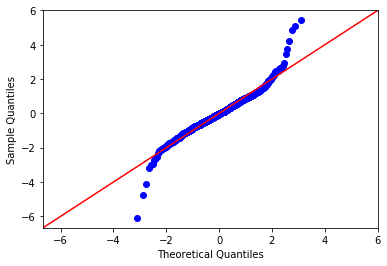

In [24]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid

# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

# 꼬리 부분이 곡선형태를 띄고 있는 것이 일반적 - 막 아래 그림이 심한 것은 아님

Text(0, 0.5, 'Residual')

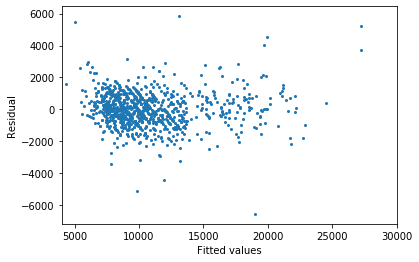

In [25]:
# residual pattern 확인
pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

# 이 정도면 잔차가 균등하게 있다!

In [26]:
 ## 검증 데이터에 대한 예측 
    
pred_y2 = fitted_full_model.predict(test_x)

In [27]:
pred_y2

684      9740.389655
692      9614.002707
77      15119.427338
498     11503.722517
426     10857.602948
            ...     
1145     7495.403581
808      8910.191898
527     10360.005008
250     12976.170442
1240     7257.056381
Length: 431, dtype: float64

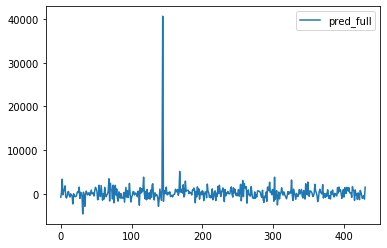

In [28]:
## 잔차 plot
plt.plot(np.array(test_y - pred_y2), label="pred_full")
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
## MSE 성능

mean_squared_error(y_true = test_y, y_pred = pred_y2)

5054627.9686476085

# 변수선택법

In [31]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E262AF87C8>, 'AIC': 19039.847219504303}


In [32]:
feature_columns

['ABS',
 'Age_08_04',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic',
 'Automatic_airco',
 'BOVAG_Guarantee',
 'Backseat_Divider',
 'Boardcomputer',
 'CD_Player',
 'CNG',
 'Central_Lock',
 'Cylinders',
 'Diesel',
 'Doors',
 'Gears',
 'Guarantee_Period',
 'HP',
 'KM',
 'Met_Color',
 'Metallic_Rim',
 'Mfg_Month',
 'Mfg_Year',
 'Mfr_Guarantee',
 'Mistlamps',
 'Petrol',
 'Power_Steering',
 'Powered_Windows',
 'Quarterly_Tax',
 'Radio',
 'Radio_cassette',
 'Sport_Model',
 'Tow_Bar',
 'Weight',
 'cc',
 'const']

In [33]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1e262afe1c8>,
 'AIC': 16948.13363853888}

In [34]:
import time
import itertools

# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
        
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic), "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 0.6034131050109863 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17527.3
Name: 211, dtype: object


In [35]:
# 변수 중 2개씩 조합

for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [36]:
# 변수 선택에 따른 학습시간과 저장
# 변수 수에 대해 모든 모델을 돌려보기에는 시간이 너무 많이 걸림 => 그래서 Feature Selection을 해야 함!!

models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.05186128616333008 seconds.
Processed  630 models on 2 predictors in 0.6274664402008057 seconds.
Processed  7140 models on 3 predictors in 8.214054584503174 seconds.
Total elapsed time: 9.042983055114746 seconds.


In [37]:
# AIC가 점점 낮아짐을 확인!

models

,AIC,model
1,17773.528284,<statsmodels.regression.linear_model.Regressio...
2,17527.289108,<statsmodels.regression.linear_model.Regressio...
3,17403.914032,<statsmodels.regression.linear_model.Regressio...


In [38]:
# 특정 조합에 대한 summary 알기

models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1896.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:10:21   Log-Likelihood:                -8698.0
No. Observations:                1005   AIC:                         1.740e+04
Df Residuals:                    1001   BIC:                         1.742e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0216      0.001    -15.697      0.000      -0.024      -0.019
Mfg_Year    1529.7379     38.161     40.086      0.000    1454.853    1604.623
Weight        17.2781      0.964     17.925      0.000      15.387      19.170
const      -3.065e+06   7.59e+04    -40.408      0.000   -3.21e+06   -2.92e+06
==============================================================================
Omnibus:                      185.189   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2429.624
Skew:                          -0.414   Prob(JB):                         0.00
Kurtosis:                      10.572   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91043
full model AIC:  16948.13364
full model MSE:  12890294.45275
selected model Rsquared:  0.85036
selected model AIC:  17403.91403
selected model MSE:  12890294.45275


Text(0, 0.5, 'BIC')

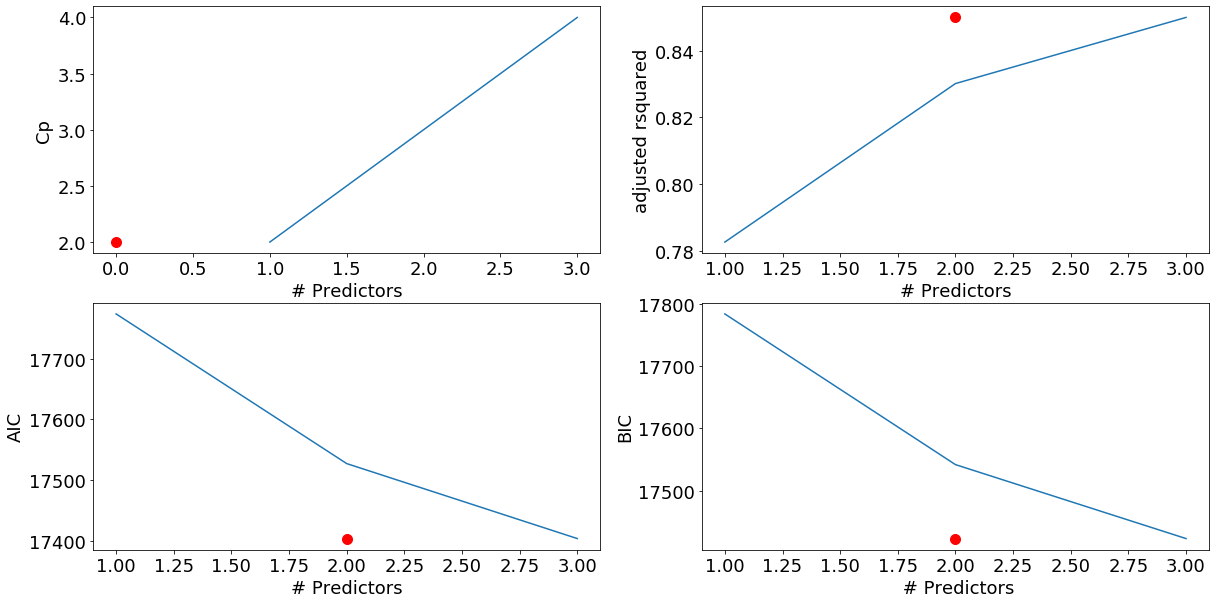

In [40]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [41]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [42]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [43]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.04089045524597168
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F418B08>
Processed  35 models on 2 predictors in 0.04089069366455078
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F421B48>
Processed  34 models on 3 predictors in 0.03989243507385254
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E2142466C8>
Processed  33 models on 4 predictors in 0.03889608383178711
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F3C1C08>
Processed  32 models on 5 predictors in 0.0359039306640625
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP',

In [44]:
Forward_best_model.aic

16931.701049817224

In [45]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     431.8
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:10:22   Log-Likelihood:                -8441.9
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     981   BIC:                         1.705e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1041.9699    128.063      8.136      0.000     790.660    1293.280
Automatic_airco   2402.6957    180.826     13.287      0.000    2047.845    2757.547
HP                  45.4211      5.734      7.921      0.000      34.169      56.674
Weight               8.1414      1.235      6.591      0.000       5.717      10.565
KM                  -0.0151      0.001    -11.737      0.000      -0.018      -0.013
Powered_Windows    472.4410     86.079      5.488      0.000     303.521     641.361
Quarterly_Tax       16.2042      1.962      8.258      0.000      12.353      20.055
Petrol            2233.5884    401.182      5.568      0.000    1446.314    3020.863
Guarantee_Period    57.1924     14.543      3.933      0.000      28.653      85.732
BOVAG_Guarantee    569.9869    133.182      4.280      0.000     308.632     831.342
Age_08_04          -31.6828     10.746     -2.948      0.003     -52.770     -10.596
Boardcomputer     -308.0383    120.875     -2.548      0.011    -545.241     -70.835
Mfr_Guarantee      233.8800     74.788      3.127      0.002      87.118     380.642
Tow_Bar           -194.3951     80.571     -2.413      0.016    -352.507     -36.283
Diesel            3040.0942    514.488      5.909      0.000    2030.471    4049.718
cc                  -2.8500      0.553     -5.149      0.000      -3.936      -1.764
Automatic          472.5957    156.667      3.017      0.003     165.156     780.036
Airco              229.4581     90.437      2.537      0.011      51.985     406.931
Sport_Model        307.8815     87.853      3.505      0.000     135.481     480.282
Backseat_Divider  -295.0065    121.406     -2.430      0.015    -533.251     -56.762
CD_Player          217.8603    103.243      2.110      0.035      15.257     420.463
Doors               89.8097     41.296      2.175      0.030       8.771     170.848
ABS               -209.2316    102.370     -2.044      0.041    -410.120      -8.343
const            -2.084e+06   2.57e+05     -8.124      0.000   -2.59e+06   -1.58e+06
==============================================================================
Omnibus:                      108.935   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              762.211
Skew:                           0.178   Prob(JB):                    3.08e-166
Kurtosis:                       7.252   Cond. No.                     5.91e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 후진소거법

In [46]:
######## 후진소거법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [47]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const']) # 상수항을 뺀 전체 변수를 넣음
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [48]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.08975982666015625
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F388B48>
Processed  35 models on 34 predictors in 0.07679462432861328
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', '

In [49]:
Backward_best_model.aic

16931.70104981726

# 단계적 선택법(stepwise)
### 전진선택법과 후진제거법을 번갈아 가면서 시행

In [50]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [51]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.033908843994140625
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F388D08>
forward
Processed  1 models on 0 predictors in 0.0009970664978027344
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F383EC8>
Processed  35 models on 2 predictors in 0.033910512924194336
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F388888>
forward
Processed  2 models on 1 predictors in 0.0029921531677246094
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F3BCD88>
Processed  34 models on 3 predictors in 0.035902976989746094
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_mod

Processed  15 models on 14 predictors in 0.026929378509521484
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'BOVAG_Guarantee', 'Age_08_04', 'Boardcomputer', 'Mfr_Guarantee', 'Tow_Bar', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F396A48>
Processed  21 models on 16 predictors in 0.04089069366455078
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'BOVAG_Guarantee', 'Age_08_04', 'Boardcomputer', 'Mfr_Guarantee', 'Tow_Bar', 'Diesel', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F36BFC8>
forward
Processed  16 models on 15 predictors in 0.027939319610595703
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 

Processed  24 models on 23 predictors in 0.04787111282348633
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'BOVAG_Guarantee', 'Age_08_04', 'Boardcomputer', 'Mfr_Guarantee', 'Tow_Bar', 'Diesel', 'cc', 'Automatic', 'Airco', 'Sport_Model', 'Backseat_Divider', 'CD_Player', 'Doors', 'ABS', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F392408>
backward
Processed  13 models on 24 predictors in 0.029920578002929688
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'BOVAG_Guarantee', 'Age_08_04', 'Boardcomputer', 'Mfr_Guarantee', 'Tow_Bar', 'Diesel', 'cc', 'Automatic', 'Airco', 'Sport_Model', 'Backseat_Divider', 'CD_Player', 'Doors', 'ABS', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F36B448>
f

Processed  13 models on 24 predictors in 0.02792668342590332
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'BOVAG_Guarantee', 'Age_08_04', 'Boardcomputer', 'Mfr_Guarantee', 'Tow_Bar', 'Diesel', 'cc', 'Automatic', 'Airco', 'Sport_Model', 'Backseat_Divider', 'CD_Player', 'Doors', 'ABS', 'Mfg_Month', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F35D308>
forward
Processed  24 models on 23 predictors in 0.055954933166503906
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'BOVAG_Guarantee', 'Age_08_04', 'Boardcomputer', 'Mfr_Guarantee', 'Tow_Bar', 'Diesel', 'cc', 'Automatic', 'Airco', 'Sport_Model', 'Backseat_Divider', 'CD_Player', 'Doors', 'ABS', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E27F367FC8>
ba

In [52]:
Stepwise_best_model.aic

16931.701049817224

# 성능평가 

In [53]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(24,) (24,) (24,)


In [54]:
Forward_best_model.model.exog_names

['Mfg_Year',
 'Automatic_airco',
 'HP',
 'Weight',
 'KM',
 'Powered_Windows',
 'Quarterly_Tax',
 'Petrol',
 'Guarantee_Period',
 'BOVAG_Guarantee',
 'Age_08_04',
 'Boardcomputer',
 'Mfr_Guarantee',
 'Tow_Bar',
 'Diesel',
 'cc',
 'Automatic',
 'Airco',
 'Sport_Model',
 'Backseat_Divider',
 'CD_Player',
 'Doors',
 'ABS',
 'const']

In [55]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [56]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [57]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [58]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   5.05463e+06  5.09725e+06  5.09725e+06  5.09725e+06
RMSE      2248.25      2257.71      2257.71      2257.71
MAE       916.276      914.732      914.732      914.732
MAPE      8.72895       8.7063       8.7063       8.7063


In [59]:
# 비슷한 성능이면 파라미터 수가 적은 것이 더 베스트!
# 따라서 feature selection한 것이 더 베스트이다!!

In [60]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
24
24
24
